In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from model import get_default_dual_pipeline_model
from matplotlib import cm

plt.rcParams["font.family"] = "Times New Roman"

In [11]:
def plot_multi_pipeline_error_field(x0):
    # configure model
    model = get_default_dual_pipeline_model()

    powers = np.linspace(model.min_power, model.max_power, 9)
    
    fig = plt.figure(figsize=(10, 10), dpi=600)
    gs = fig.add_gridspec(3, 3, hspace=0.4)
    axs = gs.subplots()
    
    for p, power in enumerate(powers):
        model.power = power
        flow_rates_pipe1 = np.linspace(-1, 1, 100)
        flow_rates_pipe2 = np.linspace(-1, 1, 100)
        differential_pressures = np.zeros((len(flow_rates_pipe1), len(flow_rates_pipe2)))
        
        # calculate pressure for different flow rate and power combinations
        for i, frp1 in enumerate(flow_rates_pipe1):
            for j, frp2 in enumerate(flow_rates_pipe2):
                model.pipelines[0].flow_rate = frp1
                model.pipelines[1].flow_rate = frp2
                
                differential_pressure = np.sum(np.power(model.differential_pressures(), 2))
                differential_pressures[j, i] = differential_pressure
                
        # optimize the flow_rates for balance
        model.pipelines[0].flow_rate = x0[0]
        model.pipelines[1].flow_rate = x0[1]
        res = model.optimize_flow_rates()
            
        # plot
        i = int(p/3)
        j = p%3
        
        axs[i, j].imshow(differential_pressures, aspect='auto', origin='lower', norm=LogNorm(), cmap=cm.inferno,
                   extent=(min(flow_rates_pipe1), max(flow_rates_pipe1), min(flow_rates_pipe2), max(flow_rates_pipe2)))
        
        # plot iterations
        axs[i, j].scatter([x[0] for x in res.xn], [x[1] for x in res.xn], s=0.5, color="blue")
        axs[i, j].scatter(res.xn[0][0], res.xn[0][1], color='blue')
        axs[i, j].scatter(model.pipelines[0].flow_rate, model.pipelines[1].flow_rate, color='red')

        axs[i, j].axhline(0, color='black')
        axs[i, j].axvline(0, color='black')

        axs[i, j].title.set_text(f"P: {power/1000:.0f}kW, niter: {len(res.xn)}")
    
    fig.suptitle(f"Error Function in System vs Pipe flow rates (x0=[{x0[0]}, {x0[1]}], scale: log)")
    fig.supxlabel('Flow Rate Pipe 1 [$m^3$]')
    fig.supylabel('Flow Rate Pipe 2 [$m^3$]')
    plt.show()

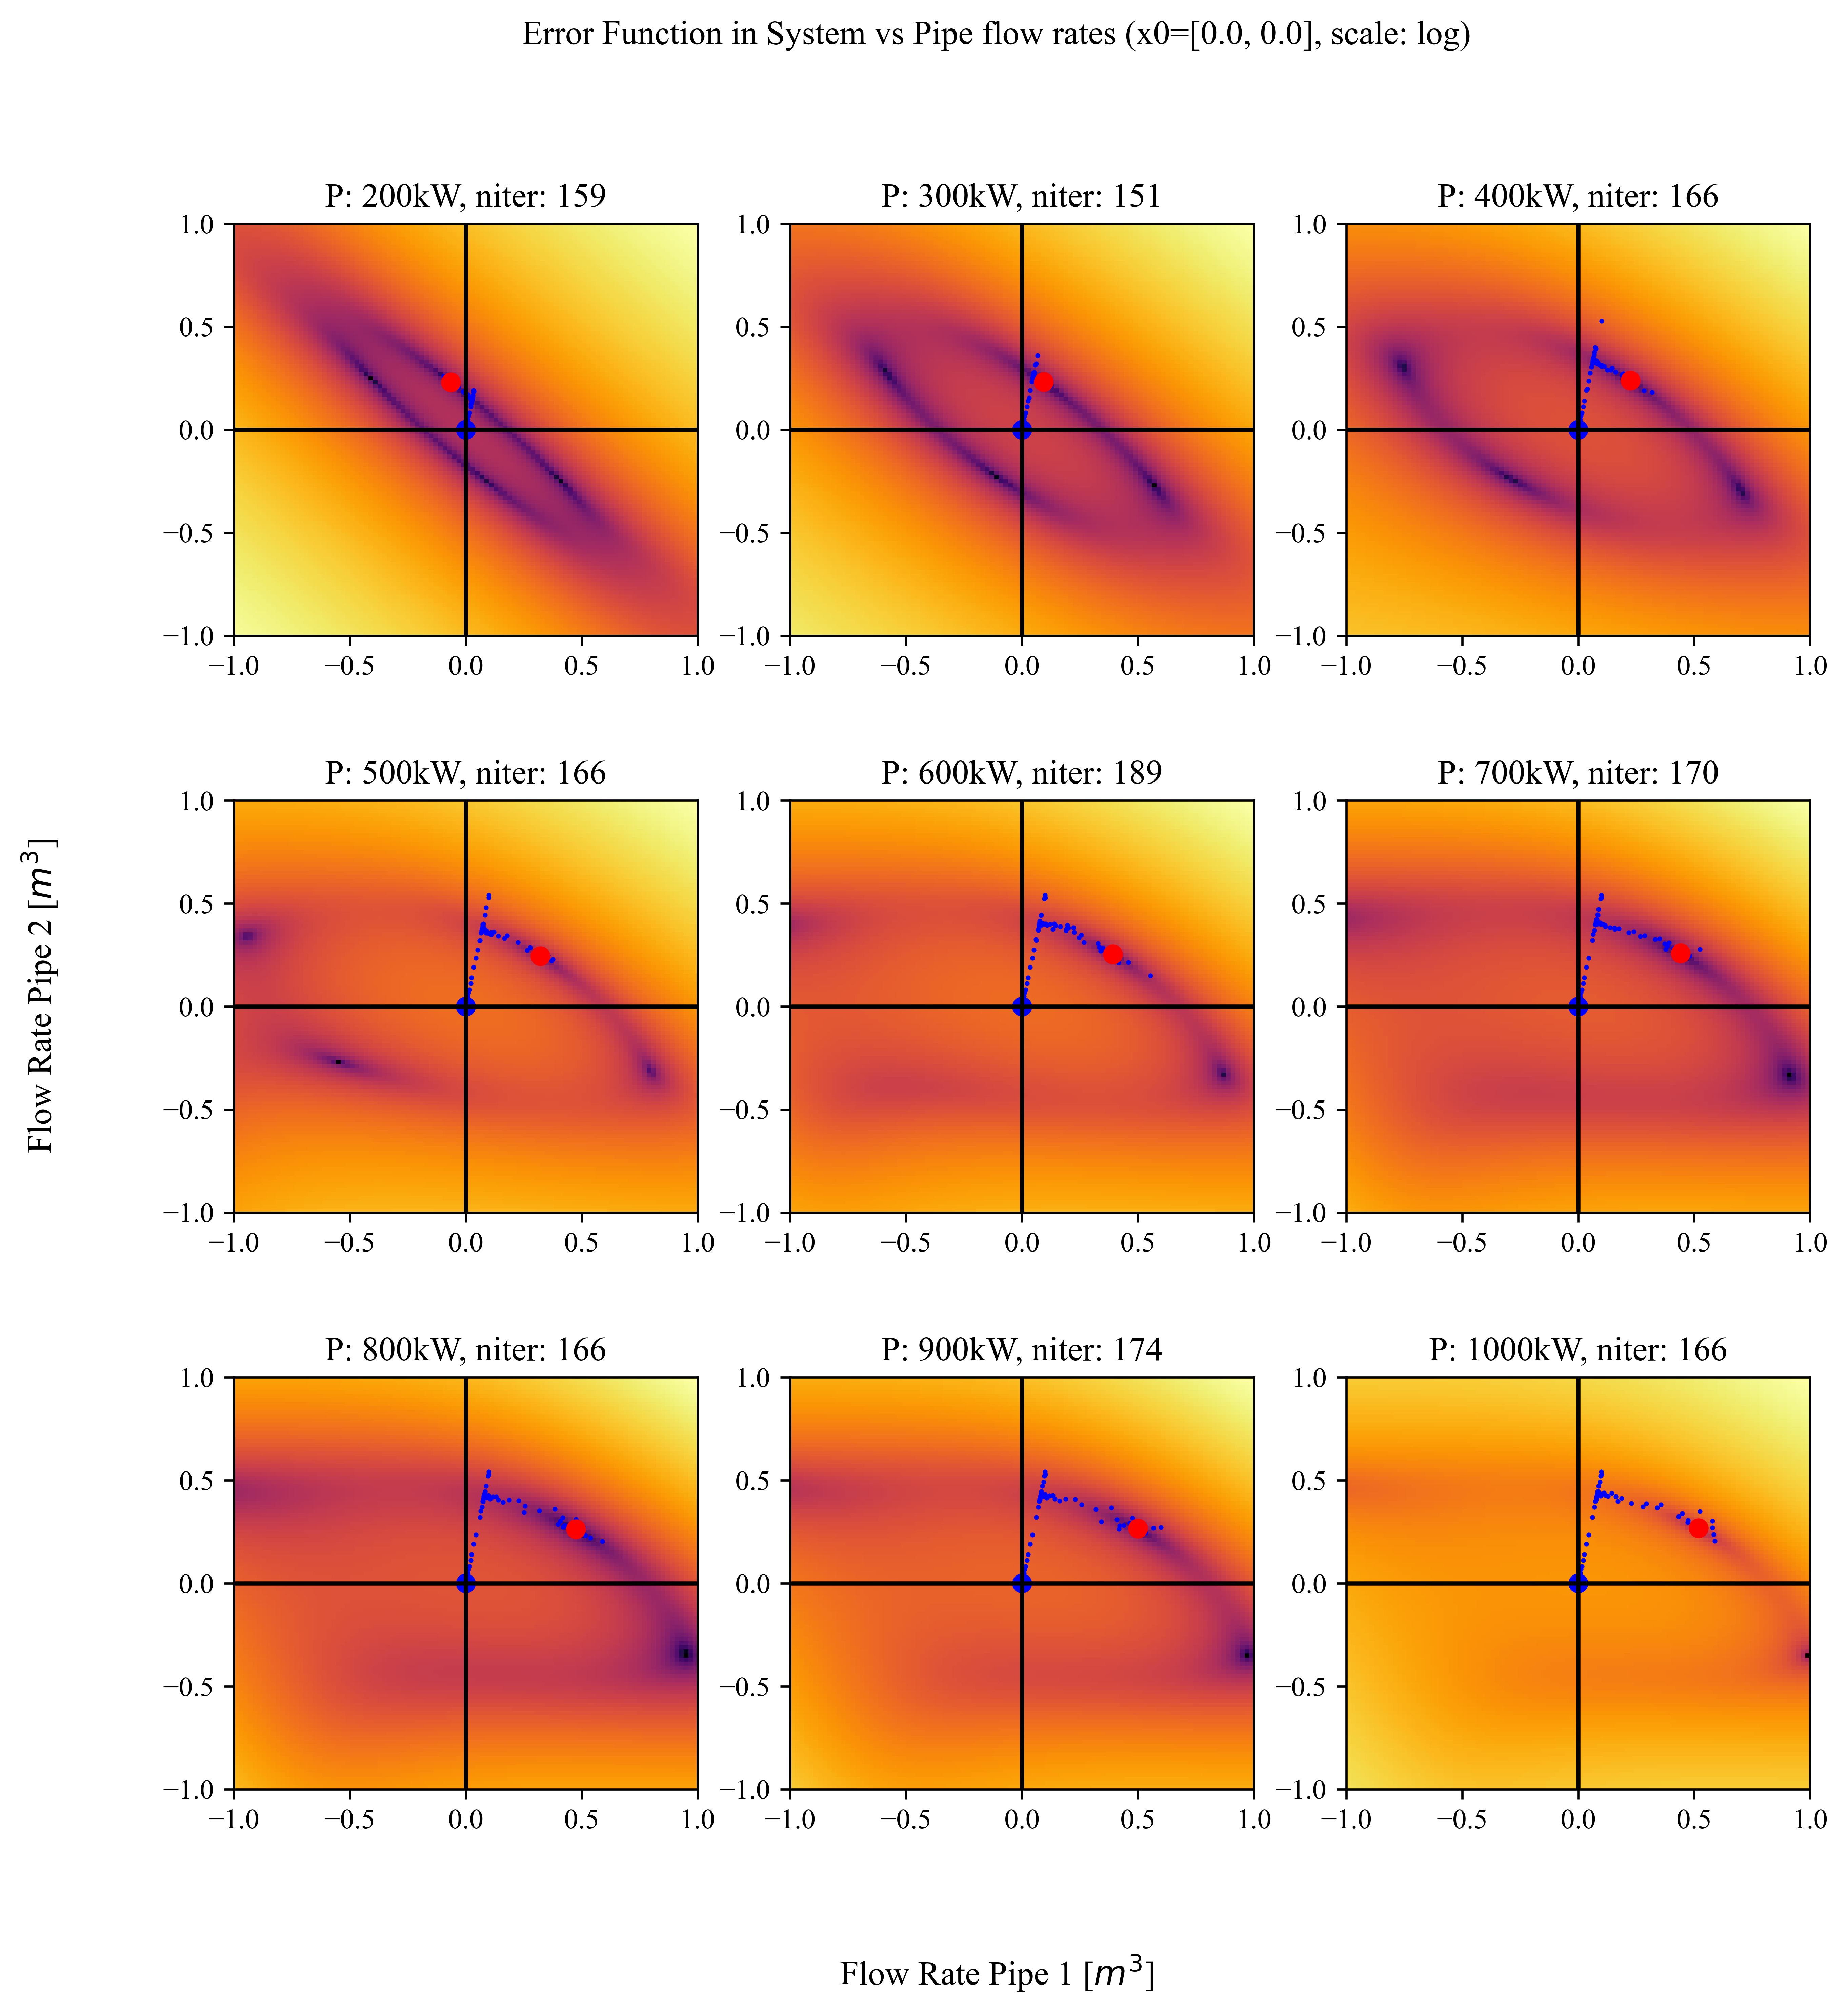

In [12]:
plot_multi_pipeline_error_field([0.0, 0.0])